In [48]:
import numpy as np
import json
import sys
import os
import mayavi
import h5py
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import rc
rc('font',**{'family':'serif','serif':['Times New Roman']})
rc('text', usetex=True)
rc('font', size=14)


with open('setup.json') as f:
    data = json.load(f)

input_path = data["inputfile_path"]
case_list = data["exec_list"]
bench_dir = data["BenchDir"]
script_dict = data["CaseParams"]
c_case_list = script_dict.keys()

# Plot 2 cases

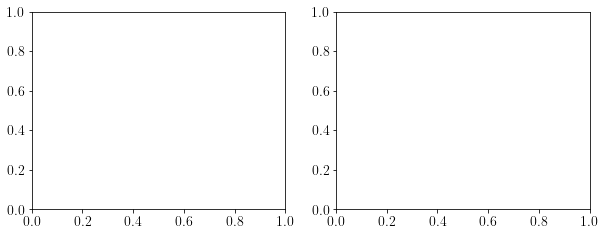

In [50]:
# plt.figure(figsize=[14,14])
plt.subplot(221)

# equivalent but more general
ax1=plt.subplot(2,2,1)
ax2=plt.subplot(2,2,2)

## 50 50 25

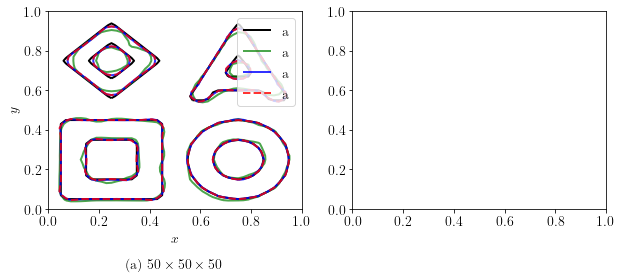

In [70]:
# plt.figure(figsize=[14,14])
plt.subplot(221)

# equivalent but more general
ax1=plt.subplot(2,2,1)
ax2=plt.subplot(2,2,2)

# DTMOF
nn = h5py.File('MOFNN/output.h5','r')
frame = 1
str_frame = "%.6f" % frame
if str_frame[0] == '0':
    str_frame = str_frame[1:]
phi_nn = np.array(nn['phi'][str_frame])


# BFGS
bfgs = h5py.File('MOFBFGS/output.h5','r')
frame = 1
str_frame = "%.6f" % frame
if str_frame[0] == '0':
    str_frame = str_frame[1:]
phi_bfgs = np.array(bfgs['phi'][str_frame])


# ELVIRA
elvira = h5py.File('ELVIRA/output.h5','r')
frame = 1
str_frame = "%.6f" % frame
if str_frame[0] == '0':
    str_frame = str_frame[1:]
phi_elvira = np.array(elvira['phi'][str_frame])


# exact
exact_data_file = input_path+"input50.h5"
init = h5py.File(exact_data_file,'r')
phi_init = np.transpose(np.array(init['phi']['init']))
init.close()
x1,y1 =np.meshgrid((np.arange(50)+0.5)/50.0,(np.arange(50)+0.5)/50.0)
# x2,y2 =np.meshgrid(np.arange(200)/4.0+0.5/50.0,np.arange(200)/4.0+0.5/50.0)

cs1 = ax1.contour(x1,y1,phi_init[:,:,12],levels=[0.5],colors='k',linewidths=2)
cs2 = ax1.contour(x1,y1,np.transpose(phi_elvira[12,:,:]),levels=[0.5],colors='g',linewidths=2,alpha=0.7)
cs3 = ax1.contour(x1,y1,np.transpose(phi_nn[12,:,:]),levels=[0.5],colors='b',linewidths=2,alpha=0.8)
cs4 = ax1.contour(x1,y1,np.transpose(phi_bfgs[12,:,:]),levels=[0.5],colors='r',linestyles='dashed',linewidths=2,alpha=0.8)

cs1.collections[0].set_label('a')
cs2.collections[0].set_label('a')
cs3.collections[0].set_label('a')
cs4.collections[0].set_label('a')

ax1.set_xbound([0,1])
ax1.set_ybound([0,1])
ax1.set_xlabel(r'$x$')
ax1.set_ylabel(r'$y$')
ax1.text(0.5, -0.3, '(a) $50 \times 50 \times 50$',ha='center')

# plt.contour(x1,y1,phi_init[:,:,12],levels=[0.5],colors='r',alpha=0.5)
ax1.legend()
# plt.show()

IndexError: list index out of range